In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# subpart (i)

# the provided data
z = [0.0,0.5,1.0,1.5,2.0] # Axial position in metres

# as data is equispaced, we define h for ease of programming
h = 0.5
P = [1.8,1.38,1.09,0.63,0.18] # Pressure in kPa

In [3]:
# we first define functions to calculate derivatives

# derivative by forward difference method; returns derivative in kPa/m units
def forw_der(x,y,i,order):
  if(i+order>=5):
    return np.nan
  elif(order==1):
    return (y[i+1]-y[i])/h
  elif(order==2):
    return (4*y[i+1]-3*y[i]-y[i+2])/(2*h)
  elif(order==3):
    return (2*y[i+3]-9*y[i+2]+18*y[i+1]-11*y[i])/(6*h)
  elif(order==4):
    return -(3*y[i+4]-16*y[i+3]+36*y[i+2]-48*y[i+1]+25*y[i])/(12*h)

# derivative by backward difference method; returns derivative in kPa/m units
def back_der(x,y,i,order):
  if(i<order):
    return np.nan
  elif(order==1):
    return -(y[i-1]-y[i])/h
  elif(order==2):
    return -(4*y[i-1]-3*y[i]-y[i-2])/(2*h)
  elif(order==3):
    return -(2*y[i-3]-9*y[i-2]+18*y[i-1]-11*y[i])/(6*h)
  elif(order==4):
    return (3*y[i-4]-16*y[i-3]+36*y[i-2]-48*y[i-1]+25*y[i])/(12*h)

# derivative by centred difference method; returns derivative in kPa/m units
def centre_der(x,y,i,order):
  if(i==2):
    if(order==1):
      return (y[i+1]-y[i-1])/(2*h)
    elif(order==2):
      return (y[i-2]-8*y[i-1]+8*y[i+1]-y[i+2])/(12*h)
  elif(i==1 or i==3):
    if(order==1):
       return (y[i+1]-y[i-1])/(2*h)

In [4]:
def der_calc(x,y,order,method):
  # n: number of data points
  ans = []
  if(method==1):
    if(order==1):
      ans.append(forw_der(x,y,0,1))
      ans.append(forw_der(x,y,1,1))
      ans.append(forw_der(x,y,2,1))
      ans.append(forw_der(x,y,3,1))
      ans.append(back_der(x,y,4,1))
      return ans,1
    elif(order==2):
      ans.append(forw_der(x,y,0,2))
      ans.append(forw_der(x,y,1,2))
      ans.append(forw_der(x,y,2,2))
      ans.append(back_der(x,y,3,2))
      ans.append(back_der(x,y,4,2))
      return ans, 2

    elif(order==3):
      ans.append(forw_der(x,y,0,3))
      ans.append(forw_der(x,y,1,3))
      ans.append(back_der(x,y,2,2))
      ans.append(back_der(x,y,3,2))
      ans.append(back_der(x,y,4,2))
      return ans,2

    elif(order==4):
      ans.append(forw_der(x,y,0,4))
      ans.append(back_der(x,y,1,1))
      ans.append(back_der(x,y,2,1))
      ans.append(back_der(x,y,3,1))
      ans.append(back_der(x,y,4,1))
      return ans,1

  if(method==-1):
    if(order==1):
      ans.append(forw_der(x,y,0,1))
      ans.append(back_der(x,y,1,1))
      ans.append(back_der(x,y,2,1))
      ans.append(back_der(x,y,3,1))
      ans.append(back_der(x,y,4,1))
      return ans, 1

    if(order==2):
      ans.append(forw_der(x,y,0,2))
      ans.append(forw_der(x,y,1,2))
      ans.append(back_der(x,y,2,2))
      ans.append(back_der(x,y,3,2))
      ans.append(back_der(x,y,4,2))
      return ans, 2

    if(order==3):
      ans.append(forw_der(x,y,0,2))
      ans.append(forw_der(x,y,1,2))
      ans.append(forw_der(x,y,2,2))
      ans.append(back_der(x,y,3,3))
      ans.append(back_der(x,y,4,3))
      return ans, 2

    if(order==4):
      ans.append(forw_der(x,y,0,1))
      ans.append(forw_der(x,y,1,1))
      ans.append(forw_der(x,y,2,1))
      ans.append(forw_der(x,y,3,1))
      ans.append(back_der(x,y,4,4))
      return ans, 1


  if(method==0):
    if(order==1):
      ans.append(forw_der(x,y,0,2))
      ans.append(centre_der(x,y,1,1))
      ans.append(centre_der(x,y,2,1))
      ans.append(centre_der(x,y,3,1))
      ans.append(back_der(x,y,4,2))
      return ans, 2

    if(order==2):
      ans.append(forw_der(x,y,0,2))
      ans.append(forw_der(x,y,1,2))
      ans.append(centre_der(x,y,2,2))
      ans.append(back_der(x,y,3,2))
      ans.append(back_der(x,y,4,2))
      return ans, 2

In [5]:
# matrix to hold values for calculated derivatives and their actual order of truncation error
matrix = []
for i in [-1,0,1]:
  for j in [1,2,3,4]:
    if(i==0 and j>2):continue
    matrix.append(der_calc(z,P,j,i))

In [6]:
# Drop Down Menu and Calculate Button Implementations

# drop down menu for type of difference method to be used
type_dropdown = widgets.Dropdown(options=['Forward','Backward','Centred'], description='Type:')

# drop down menu for order
order_dropdown = widgets.Dropdown(options=['First','Second','Third','Fourth'], description='Order:')

# type map
map1 = {'Forward':6,'Backward':0,'Centred':4}
# order map
map2 = {'First':0,'Second':1,'Third':2,'Fourth':3}

# Button to calculate
calculate_button = widgets.Button(description='Calculate')

# function to be executed on pressing button
def button_function(button):
  selected_type = type_dropdown.value
  selected_order = order_dropdown.value

  if(map1[selected_type]==4 and map2[selected_order]>1):
    print(f"Centred Difference Method cannot be applied for higher than second order as there are only 5 data points\n")
    return
  dict = {'z in metre':z, "P'(z) in kPa/metre":matrix[map1[selected_type] + map2[selected_order]][0]}
  df = pd.DataFrame(dict)
  print(f"The derivatives calculated using {selected_order} order {selected_type} difference method are:")
  print(df)
  print(f"The actual order of truncation error is {matrix[map1[selected_type] + map2[selected_order]][1]}\n")


calculate_button.on_click(button_function)

print('Select the type and order of the method to use for calculating derivatives\n')
# Display drop down menus and calculate button
display(type_dropdown, order_dropdown, calculate_button)

Select the type and order of the method to use for calculating derivatives



Dropdown(description='Type:', options=('Forward', 'Backward', 'Centred'), value='Forward')

Dropdown(description='Order:', options=('First', 'Second', 'Third', 'Fourth'), value='First')

Button(description='Calculate', style=ButtonStyle())

The derivatives calculated using First order Forward difference method are:
   z in metre  P'(z) in kPa/metre
0         0.0               -0.84
1         0.5               -0.58
2         1.0               -0.92
3         1.5               -0.90
4         2.0               -0.90
The actual order of truncation error is 1

The derivatives calculated using Second order Forward difference method are:
   z in metre  P'(z) in kPa/metre
0         0.0               -0.97
1         0.5               -0.41
2         1.0               -0.93
3         1.5               -1.09
4         2.0               -0.89
The actual order of truncation error is 2

The derivatives calculated using Third order Forward difference method are:
   z in metre  P'(z) in kPa/metre
0         0.0               -1.17
1         0.5               -0.29
2         1.0               -0.45
3         1.5               -1.09
4         2.0               -0.89
The actual order of truncation error is 2

The derivatives calculated usi

In [7]:
# subpart (ii)
# we first define a function which takes dP/dz as input and returns εₛ as the answer
def es_calc(der):
  ro_s = 2650
  ro_g = 1.2
  g = 9.81
  return ((-1000*der)/g - ro_g ) / (ro_s - ro_g)

In [8]:
# we can use the above calculated values of dP/dz and use them to find εₛ from the given differential equation
es_array = []

# using the derivative with the highest order of truncation error at each point
es_array.append(es_calc(matrix[map1['Forward'] + map2['Fourth']][0][0]))
es_array.append(es_calc(matrix[map1['Forward'] + map2['Third']][0][1]))
es_array.append(es_calc(matrix[map1['Centred'] + map2['Second']][0][2]))
es_array.append(es_calc(matrix[map1['Backward'] + map2['Third']][0][3]))
es_array.append(es_calc(matrix[map1['Backward'] + map2['Fourth']][0][4]))


In [9]:
# printing table
d = {'z in metres':z,
     'εₛ':es_array}
df = pd.DataFrame(d)
print(df)

   z in metres        εₛ
0          0.0  0.053810
1          0.5  0.010707
2          1.0  0.027640
3          1.5  0.049192
4          2.0  0.019944


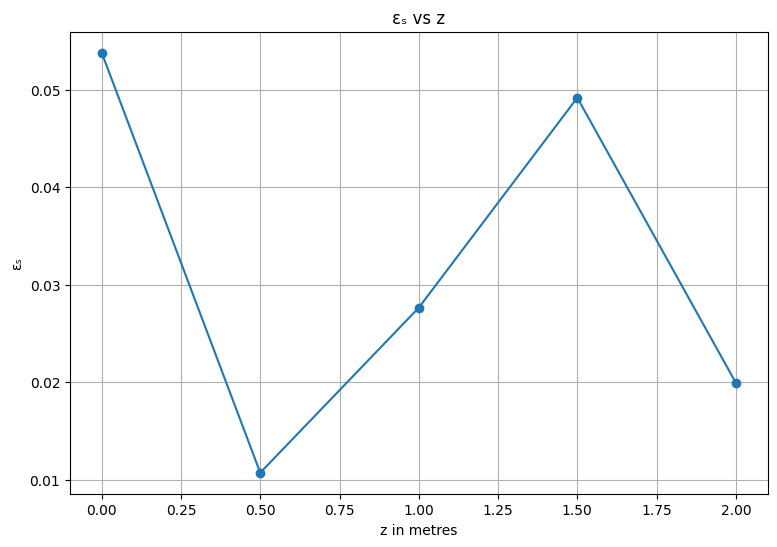

In [10]:
# plotting commands
plt.figure(figsize=(9,6))
plt.grid()
plt.plot(z,es_array,'-o')
plt.title("εₛ vs z")
plt.xlabel('z in metres')
plt.ylabel("εₛ")
plt.show()